In [1]:
# Installing TF 2.0 as I am on Google Colab
!pip install -q tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 53kB/s 
     |████████████████████████████████| 61kB 21.4MB/s 
     |████████████████████████████████| 419kB 25.7MB/s 
     |████████████████████████████████| 3.0MB 28.7MB/s 


In [0]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import *

import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np
np.random.seed(7)

In [3]:
# Verify the version
print(tf.__version__)

2.0.0-alpha0


In [4]:
# Load the FashionMNIST dataset and
# Standardize it
fashion_mnist = mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


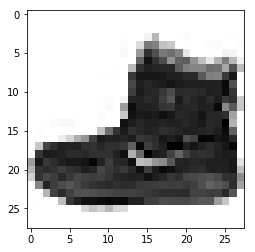

Class label 9


In [5]:
# A sample image
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

print('Class label {}'.format(y_train[0]))

In [7]:
# Shape of a single image
x_train[0].shape

(28, 28)

The images are of **28x28** dimensionality and all of them are in **grayscale**.

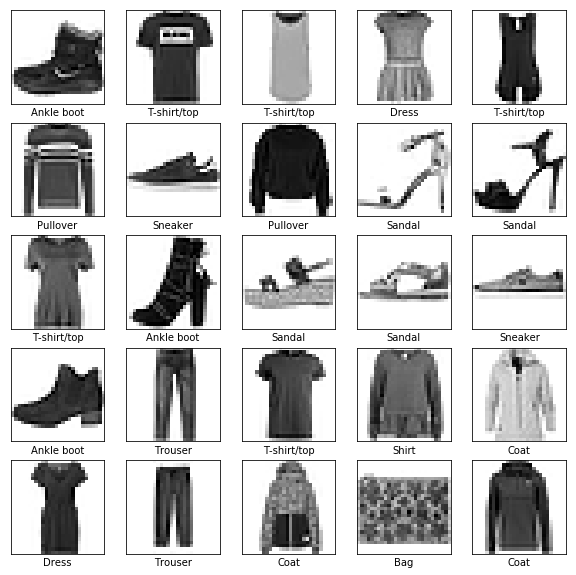

In [8]:
# Show a montage
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
# Reshaping the images so that our model can accept it
x_train  = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [0]:
# Define the Convolutional Neural Network
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu')
])

In [0]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

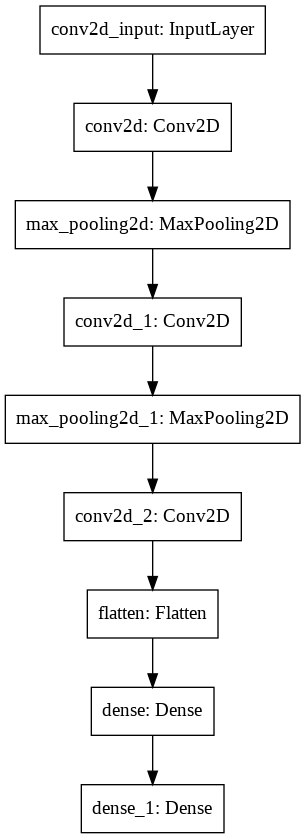

In [16]:
# Plot model graph
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png')

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [0]:
# Train the model with an EarlyStopping and ModelCheckpoint callbacks

es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

filepath="improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc',
                                 verbose=1, save_best_only=True, mode='max')

callbacks_list = [es_cb, checkpoint]

In [36]:
model.fit(x_train, y_train,
           validation_data=(x_test, y_test),
           batch_size=64,
           epochs=40,
           callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
59712/60000 [============================>.] - ETA: 0s - loss: 0.5533 - acc: 0.7978
Epoch 00001: val_acc improved from -inf to 0.84870, saving model to improvement-01-0.85.hdf5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.5526 - acc: 0.7981 - val_loss: 0.4204 - val_acc: 0.8487
Epoch 2/40
59968/60000 [============================>.] - ETA: 0s - loss: 0.3492 - acc: 0.8734
Epoch 00002: val_acc improved from 0.84870 to 0.87650, saving model to improvement-02-0.88.hdf5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3493 - acc: 0.8734 - val_loss: 0.3417 - val_acc: 0.8765
Epoch 3/40
59776/60000 [============================>.] - ETA: 0s - loss: 0.2976 - acc: 0.8915
Epoch 00003: val_acc improved from 0.87650 to 0.88220, saving model to improvement-03-0.88.hdf5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2975 - acc: 0.8916 - val_loss: 0.3264 - val_acc:

In [38]:
# Evaluate the best model
model.load_weights('improvement-13-0.91.hdf5')
scores = model.evaluate(x_test, y_test, verbose=False)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 91.43%
